# Data Exploration & Cleaning

In [8]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#pd.set_option('display.max_colwidth', None)

In [10]:
episodes_df = pd.read_csv('../data/interim_data/star_trek_episodes_scripts.csv', index_col=0)

In [11]:
episodes_df.head()

,series,production_number,episode_title,script_link,script
0,StarTrek,1,The Cage,http://www.chakoteya.net/StarTrek/1.htm,\n\n\n\n\n\nThe Star Trek Transcripts - The Ca...
1,StarTrek,6,The Man Trap,http://www.chakoteya.net/StarTrek/6.htm,\n\n\n\n\n\nThe Star Trek Transcripts - The Ma...
2,StarTrek,8,Charlie X,http://www.chakoteya.net/StarTrek/8.htm,\n\n\n\n\n\nThe Star Trek Transcripts - Charli...
3,StarTrek,2,Where No Man Has Gone Before,http://www.chakoteya.net/StarTrek/2.htm,\n\n\n\n\n\nThe Star Trek Transcripts - Where ...
4,StarTrek,7,The Naked Time,http://www.chakoteya.net/StarTrek/7.htm,\n\n\n\n\n\nThe Star Trek Transcripts - The Na...


In [12]:
print("Number of series in Dataset: ", episodes_df['series'].nunique())
print("Number of unique episode titles in Dataset: ", episodes_df['episode_title'].nunique())
print("Number of unique episode links in Dataset: ", episodes_df['script_link'].nunique())
print("Number of unique episode scripts in Dataset: ", episodes_df['script'].nunique())

Number of series in Dataset:  6
Number of unique episode titles in Dataset:  728
Number of unique episode links in Dataset:  728
Number of unique episode scripts in Dataset:  724


In [13]:
episodes_df[episodes_df.duplicated(['script'])]

,series,production_number,episode_title,script_link,script
493,Voyager,222,Basics\r\nPart II,http://www.chakoteya.net/Voyager/222.htm#To%20...,\n\n\n\n\n\nThe Voyager Transcripts - Basics\n...
518,Voyager,321,Scorpion\r\nPart 2,http://www.chakoteya.net/Voyager/321.htm#To%20...,\n\n\n\n\n\nThe Voyager Transcripts - Scorpion...
567,Voyager,525,Equinox\r\nPart 2,http://www.chakoteya.net/Voyager/525.htm#To%20...,\n\n\n\n\n\nThe Voyager Transcripts - Equinox\...
593,Voyager,625,Unimatrix\r\nZero Part II,http://www.chakoteya.net/Voyager/625.htm#To%20...,\n\n\n\n\n\nThe Voyager Transcripts - Unimatri...


Continued episodes link to the same script.

In [14]:
# Change title of first part episodes into part I & II
print(episodes_df.iloc[[492]]['episode_title'])
print(episodes_df.iloc[[493]]['episode_title'])

print(episodes_df.iloc[[517]]['episode_title'])
print(episodes_df.iloc[[518]]['episode_title'])

print(episodes_df.iloc[[566]]['episode_title'])
print(episodes_df.iloc[[567]]['episode_title'])

print(episodes_df.iloc[[592]]['episode_title'])
print(episodes_df.iloc[[593]]['episode_title'])

492    Basics Part I
Name: episode_title, dtype: object
493    Basics\r\nPart II
Name: episode_title, dtype: object
517    Scorpion Part I
Name: episode_title, dtype: object
518    Scorpion\r\nPart 2
Name: episode_title, dtype: object
566    Equinox Part I
Name: episode_title, dtype: object
567    Equinox\r\nPart 2
Name: episode_title, dtype: object
592    Unimatrix Zero Part I
Name: episode_title, dtype: object
593    Unimatrix\r\nZero Part II
Name: episode_title, dtype: object


In [15]:
episodes_df.at[492, 'episode_title'] = 'Basics Part I and II'
episodes_df.at[517, 'episode_title'] = 'Scorpion Part I and II'
episodes_df.at[566, 'episode_title'] = 'Equinox Part I and II'
episodes_df.at[592, 'episode_title'] = 'Unimatrix Part I and II'

In [16]:
# Remove duplicate episodes
episodes_df = episodes_df[~episodes_df.duplicated(['script'], keep='first')]

In [17]:
episodes_df[episodes_df.duplicated(['script'])]

,series,production_number,episode_title,script_link,script


In [18]:
episodes_df.describe(include='all')

,series,production_number,episode_title,script_link,script
count,724,724,724,724,724
unique,6,549,724,724,724
top,NextGen,113,"The Maquis, part two",http://www.chakoteya.net/Enterprise/37.htm,\n\n\n\n\n\nThe Next Generation Transcripts - ...
freq,176,3,1,1,1


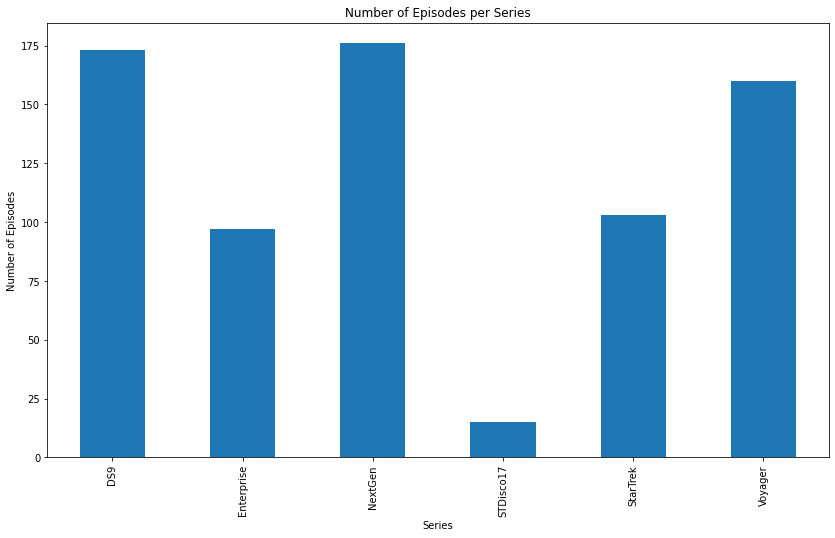

In [19]:
ax = episodes_df['series'].value_counts().sort_index().plot(kind='bar',
                                         figsize=(14,8))
plt.xlabel('Series')
plt.ylabel('Number of Episodes')
plt.title('Number of Episodes per Series')
plt.show()

## Clean up titles

In [20]:
pd.set_option('display.max_rows', None)
episodes_df['episode_title']

0                                              The Cage
1                                          The Man Trap
2                                             Charlie X
3                          Where No Man Has Gone Before
4                                        The Naked Time
5                                      The Enemy Within
6                                          Mudd's Women
7                        What Are Little Girls Made Of?
8                                                  Miri
9                                    Dagger Of The Mind
10                               The Corbomite Maneuver
11                                The Menagerie, part 1
12                                The Menagerie, part 2
13                           The Conscience of the King
14                                    Balance of Terror
15                                          Shore Leave
16                                    The Galileo Seven
17                                 The Squire of

In [21]:
def clean_title(title):
    # remove leading/trailing whitespace
    clean_title = title.strip()
    # replace '\r\n' char sequance
    clean_title = clean_title.replace('\r\n',' ')
    return clean_title

In [22]:
episodes_df['episode_title_processed'] = episodes_df['episode_title'].map(lambda x: clean_title(x))

In [23]:
episodes_df[['episode_title', 'episode_title_processed']]

,episode_title,episode_title_processed
0,The Cage,The Cage
1,The Man Trap,The Man Trap
2,Charlie X,Charlie X
3,Where No Man Has Gone Before,Where No Man Has Gone Before
4,The Naked Time,The Naked Time
5,The Enemy Within,The Enemy Within
6,Mudd's Women,Mudd's Women
7,What Are Little Girls Made Of?,What Are Little Girls Made Of?
8,Miri,Miri
9,Dagger Of The Mind,Dagger Of The Mind


## Clean up scripts

1. Cleanup specific for these scripts:
    * special char sequences
    * specific parts of text that are not script but references to wesbite/copyright etc.
2. Data Preprocessing - Text Preprocessing Steps:
    * **Regular Expression/Normalization** — lowercase the words, remove punctuation and remove numbers
    * **Tokenization** — a process of splitting the text into smaller pieces called tokens
    * **Stop Words Removal** — a set of commonly used words in any language
    * **Lemmatization** — a process of grouping together the inflected forms of a word so they can be analyzed as a single item
    * **Stemming** — a process of grouping together the inflected forms of a word so they can be analyzed as a single item

### 1. Initial cleanup specific for these texts

In [24]:
def init_clean_text(text):
    # replac \r\n character sequence with space
    clean_text = text.replace('\r\n', ' ')
    
    # rm 'The Star Trek Transcripts - ' etc. line 
    clean_text = clean_text.replace('The Star Trek Transcripts - ', '')
    clean_text = clean_text.replace('The Animated Star Trek Transcripts - ', '')
    clean_text = clean_text.replace('The Next Generation Transcripts - ', '')
    clean_text = clean_text.replace('The Deep Space Nine Transcripts - ', '')
    clean_text = clean_text.replace('The Voyager Transcripts - ', '')
    clean_text = clean_text.replace('The Enterprise Transcripts - ', '')
    clean_text = clean_text.replace('Star Trek Discovery Transcripts - ', '')
    
    # remove reference at the end of document
    clean_text = clean_text.replace('<Back to the episode listing Star Trek ® is copyright of CBS Studios Inc. Copyright © 1966, Present. The Star Trek web pages on this site are for educational and entertainment purposes only. All other copyrights property of their respective holders.', '')
    
    return clean_text

In [25]:
episodes_df['script_processed'] = episodes_df['script'].map(lambda x: init_clean_text(x))

In [26]:
episodes_df.to_csv('../data/interim_data/star_trek_episodes_scripts_init_clean.csv')

### 2. Preprocessing

* [Topic Modeling in R With tidytext and textmineR Package (Latent Dirichlet Allocation)](https://medium.com/swlh/topic-modeling-in-r-with-tidytext-and-textminer-package-latent-dirichlet-allocation-764f4483be73)
* [KDnuggets | Text Wrangling & Pre-processing: A Practitioner’s Guide to NLP](https://www.kdnuggets.com/2018/08/practitioners-guide-processing-understanding-text-2.html)

* [NLP – Expand contractions in Text Processing](https://www.geeksforgeeks.org/nlp-expand-contractions-in-text-processing/)

In [27]:
import nltk
import contractions
import unicodedata

In [28]:
def normalize_text(text):
    # To lowercase
    clean_text = text.lower()
    
    # remove numbers, punctuation/special characters
    pattern = r'[^a-zA-z0-9\s]'
    
    clean_text = re.sub(pattern, '', clean_text)
    
    # remove repeated whitespace inside a string
    clean_text = re.sub('\s+',' ', clean_text)
    
    # replace multiple newlines with space
    clean_text = re.sub(r'\n+', ' ', clean_text)
    
    # remove leading and trailing whitespace
    clean_text = clean_text.strip()
    
    return clean_text

In [31]:
episodes_df['script_normalized'] = episodes_df['script_processed'].map(lambda x: normalize_text(x))

In [ ]:
# remove accented characters
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [ ]:
# replace contraction with multi word form
def expand_contractions(text):
    expanded_words = []
    for word in text.clean_split():
        expanded_words.append(contractions.fix(word))
        
    expanded_text = ' '.join(expanded_words)
    return expanded_text

In [ ]:
# replace informal writing?

In [ ]:
episodes_df.head()

In [ ]:
test_txt = episodes_df.iloc[0]['script_processed']

In [ ]:
test_txt

In [32]:
episodes_df[['script', 'script_processed', 'script_normalized']]

,script,script_processed,script_normalized
0,\n\n\n\n\n\nThe Star Trek Transcripts - The Ca...,\n\n\n\n\n\nThe Cage\n\n\n\nThe Cage\nUnaired ...,the cage the cage unaired pilot [bridge] spock...
1,\n\n\n\n\n\nThe Star Trek Transcripts - The Ma...,\n\n\n\n\n\nThe Man Trap\n\n\n\nThe Man Trap\n...,the man trap the man trap stardate 15131 origi...
2,\n\n\n\n\n\nThe Star Trek Transcripts - Charli...,\n\n\n\n\n\nCharlie X\n\n\n\nCharlie X\nStarda...,charlie x charlie x stardate 15336 original ai...
3,\n\n\n\n\n\nThe Star Trek Transcripts - Where ...,\n\n\n\n\n\nWhere No Man Has Gone Before\n\n\n...,where no man has gone before where no man has ...
4,\n\n\n\n\n\nThe Star Trek Transcripts - The Na...,\n\n\n\n\n\nThe Naked Time\n\n\n\nThe Naked Ti...,the naked time the naked time stardate 17042 o...
5,\n\n\n\n\n\nThe Star Trek Transcripts - The En...,\n\n\n\n\n\nThe Enemy Within\n\n\n\nThe Enemy ...,the enemy within the enemy within stardate 167...
6,\n\n\n\n\n\nThe Star Trek Transcripts - Mudd's...,\n\n\n\n\n\nMudd's Women\n\n\nMudd's Women\nSt...,mudds women mudds women stardate 13298 origina...
7,\n\n\n\n\n\nThe Star Trek Transcripts - What A...,\n\n\n\n\n\nWhat Are Little Girls Made Of?\n\n...,what are little girls made of what are little ...
8,\n\n\n\n\n\n\nThe Star Trek Transcripts - Miri...,\n\n\n\n\n\n\nMiri\n\n\n\nMiri\nStardate: 2713...,miri miri stardate 27135 original airdate oct ...
9,\n\n\n\n\n\nThe Star Trek Transcripts - Dagger...,\n\n\n\n\n\nDagger Of The Mind\n\n\n\nDagger O...,dagger of the mind dagger of the mind stardate...


In [ ]:
# drop original title & script cols
# rename processed columns

In [ ]:
display(episodes_df)

In [ ]:
episodes_df.to_csv('../data/interim_data/star_trek_episodes_scripts_preprocessed.csv')